In [1]:
import jieba
import csv
import wordcloud
import matplotlib.pyplot as plt

In [2]:
with open('yyqx_csv.csv','r',encoding='utf-8') as f:
    reader=csv.reader(f)
    content=[row[1]for row in reader][1:]

In [3]:
len(content)

828

In [4]:
content

['[置顶]补作业 7000W请查收 TFBOYS-易烊千玺的微博视频 \xa0',
 '好久不见，哥@胡歌 ，一起去看场电影？ #LongTimeNoSee# FIRST青年电影展的秒拍视频 \xa0',
 '今晚八点，@阿玛尼 星品线上发布会，不见不散。 \xa0原图\xa0',
 '转发理由:坚持自我主张，展现自信态度，和我一起成为#无可T代#的自己。@TiffanyAndCo蒂芙尼\xa0\xa0',
 '谢谢倾听和陪伴，今日收官，我们不说告别。#朋友请听好# \xa0[组图共4张]\xa0原图\xa0',
 '转发理由:今晚七点，@可爱多 线上发布会见。#吃在一起 可爱多了#\xa0\xa0',
 '转发理由:小彤哥新剧明天开播，看起来\xa0\xa0',
 '#朋友请听好#“湖南地方代表队”上线🤗朋友请听好第10期：千玺李俊濠变湖南代表队！ 谢娜被张颜齐猜崩溃？ \xa0[组图共3张]\xa0原图\xa0',
 '#相信未来义演# “乐”抚人心，希望这首《南屏晚钟》能给大家带来温暖。 TFBOYS-易烊千玺的微博视频 \xa0',
 '#朋友请听好# “在水一方器乐团”直播首秀朋友请听好第9期：“在水一方乐器团”限定营业 何炅假期过后考虑退休？ \xa0[组图共4张]\xa0原图\xa0',
 '转发理由:#因为热爱，尽善而行# 和麦当劳一起，遇见更多美好。\xa0\xa0',
 '#奋斗吧青春# 《奋斗的青春最美丽——2020年五·四青年节特别节目》，今晚在CCTV1、CCTV3播出，一起奋斗一起追梦！ \xa0[组图共2张]\xa0原图\xa0',
 '转发理由:#五四致敬战疫青年# 致敬战疫青年，致敬最可爱的人！#谢谢你保护了我们#//@TFBOYS组合:#五四致敬战疫青年#五四青年节到来，让我们说一声，#谢谢你保护了我们#\xa0\xa0',
 '#朋友请听好# 一起来听小站音乐会 朋友请听好第8期：千玺又被谢娜套路要跳拉丁？ 杨迪沉浸式读信扮演蟑螂笑Skr人 \xa0[组图共4张]\xa0原图\xa0',
 '今晚十点，湖南卫视#朋友请听好#，一起来听广播剧。 \xa0[组图共2张]\xa0原图\xa0',
 '#华为nova7#系列新品发布会对焦ing @华为终端官方微博 的一直播 \xa0[组图共2张]\xa0原图\xa0',
 '问题和烦

In [5]:
stopwords_list = [k.strip() for k in open('stopwords.txt', encoding='utf8').readlines() if k.strip() != '\n']

In [6]:
len(stopwords_list)

1893

In [7]:
def stopwords_append(s,stopwords_list):
    if s not in stopwords_list:
        stopwords_list.append(s)

In [8]:
stopwords_append('置顶',stopwords_list)
stopwords_append('转发理由',stopwords_list)
stopwords_append('转发',stopwords_list)
stopwords_append('理由',stopwords_list)
stopwords_append('明星动态',stopwords_list)
stopwords_append('微博视频',stopwords_list)
stopwords_append('原图',stopwords_list)
stopwords_append('易',stopwords_list)
stopwords_append('烊',stopwords_list)
stopwords_append('千玺',stopwords_list)
stopwords_append(' ',stopwords_list)
stopwords_append('\xa0',stopwords_list)
stopwords_append('组图',stopwords_list)
stopwords_append('张',stopwords_list)
stopwords_append('',stopwords_list)
stopwords_append('视频',stopwords_list)
stopwords_append('http',stopwords_list)
stopwords_append('cn',stopwords_list)
stopwords_append('微博',stopwords_list)
stopwords_append('番茄',stopwords_list)
stopwords_append('图片',stopwords_list)

In [9]:
txt=' '.join(content)

In [10]:
txt

'[置顶]补作业 7000W请查收 TFBOYS-易烊千玺的微博视频 \xa0 好久不见，哥@胡歌 ，一起去看场电影？ #LongTimeNoSee# FIRST青年电影展的秒拍视频 \xa0 今晚八点，@阿玛尼 星品线上发布会，不见不散。 \xa0原图\xa0 转发理由:坚持自我主张，展现自信态度，和我一起成为#无可T代#的自己。@TiffanyAndCo蒂芙尼\xa0\xa0 谢谢倾听和陪伴，今日收官，我们不说告别。#朋友请听好# \xa0[组图共4张]\xa0原图\xa0 转发理由:今晚七点，@可爱多 线上发布会见。#吃在一起 可爱多了#\xa0\xa0 转发理由:小彤哥新剧明天开播，看起来\xa0\xa0 #朋友请听好#“湖南地方代表队”上线🤗朋友请听好第10期：千玺李俊濠变湖南代表队！ 谢娜被张颜齐猜崩溃？ \xa0[组图共3张]\xa0原图\xa0 #相信未来义演# “乐”抚人心，希望这首《南屏晚钟》能给大家带来温暖。 TFBOYS-易烊千玺的微博视频 \xa0 #朋友请听好# “在水一方器乐团”直播首秀朋友请听好第9期：“在水一方乐器团”限定营业 何炅假期过后考虑退休？ \xa0[组图共4张]\xa0原图\xa0 转发理由:#因为热爱，尽善而行# 和麦当劳一起，遇见更多美好。\xa0\xa0 #奋斗吧青春# 《奋斗的青春最美丽——2020年五·四青年节特别节目》，今晚在CCTV1、CCTV3播出，一起奋斗一起追梦！ \xa0[组图共2张]\xa0原图\xa0 转发理由:#五四致敬战疫青年# 致敬战疫青年，致敬最可爱的人！#谢谢你保护了我们#//@TFBOYS组合:#五四致敬战疫青年#五四青年节到来，让我们说一声，#谢谢你保护了我们#\xa0\xa0 #朋友请听好# 一起来听小站音乐会 朋友请听好第8期：千玺又被谢娜套路要跳拉丁？ 杨迪沉浸式读信扮演蟑螂笑Skr人 \xa0[组图共4张]\xa0原图\xa0 今晚十点，湖南卫视#朋友请听好#，一起来听广播剧。 \xa0[组图共2张]\xa0原图\xa0 #华为nova7#系列新品发布会对焦ing @华为终端官方微博 的一直播 \xa0[组图共2张]\xa0原图\xa0 问题和烦恼，让书籍给你答案。#423听书节# 来@喜马拉雅  #有声图书馆#，寻找更多未知的答案。 \xa0原图\xa0 定义意式优雅，致

In [11]:
word_list=jieba.lcut(txt)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ESTELL~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.715 seconds.
Prefix dict has been built successfully.


In [12]:
word_list

['[',
 '置顶',
 ']',
 '补',
 '作业',
 ' ',
 '7000W',
 '请',
 '查收',
 ' ',
 'TFBOYS',
 '-',
 '易',
 '烊',
 '千玺',
 '的',
 '微博',
 '视频',
 ' ',
 '\xa0',
 ' ',
 '好久不见',
 '，',
 '哥',
 '@',
 '胡歌',
 ' ',
 '，',
 '一起',
 '去',
 '看场',
 '电影',
 '？',
 ' ',
 '#',
 'LongTimeNoSee',
 '#',
 ' ',
 'FIRST',
 '青年',
 '电影展',
 '的',
 '秒',
 '拍',
 '视频',
 ' ',
 '\xa0',
 ' ',
 '今晚',
 '八点',
 '，',
 '@',
 '阿玛尼',
 ' ',
 '星品线',
 '上',
 '发布会',
 '，',
 '不见不散',
 '。',
 ' ',
 '\xa0',
 '原图',
 '\xa0',
 ' ',
 '转发',
 '理由',
 ':',
 '坚持',
 '自我',
 '主张',
 '，',
 '展现',
 '自信',
 '态度',
 '，',
 '和',
 '我',
 '一起',
 '成为',
 '#',
 '无可',
 'T',
 '代',
 '#',
 '的',
 '自己',
 '。',
 '@',
 'TiffanyAndCo',
 '蒂',
 '芙尼',
 '\xa0',
 '\xa0',
 ' ',
 '谢谢',
 '倾听',
 '和',
 '陪伴',
 '，',
 '今日',
 '收官',
 '，',
 '我们',
 '不说',
 '告别',
 '。',
 '#',
 '朋友',
 '请',
 '听',
 '好',
 '#',
 ' ',
 '\xa0',
 '[',
 '组图',
 '共',
 '4',
 '张',
 ']',
 '\xa0',
 '原图',
 '\xa0',
 ' ',
 '转发',
 '理由',
 ':',
 '今晚',
 '七点',
 '，',
 '@',
 '可爱多',
 ' ',
 '线上',
 '发布会',
 '见',
 '。',
 '#',
 '吃',
 '在',
 '一起',
 ' ',
 '可爱多',
 '了',
 '

In [13]:
word_list=[i for i in word_list if i not in stopwords_list]

In [14]:
word_list

['补',
 '作业',
 '7000W',
 '请',
 '查收',
 'TFBOYS',
 '好久不见',
 '哥',
 '胡歌',
 '看场',
 '电影',
 'LongTimeNoSee',
 'FIRST',
 '青年',
 '电影展',
 '秒',
 '拍',
 '今晚',
 '八点',
 '阿玛尼',
 '星品线',
 '发布会',
 '不见不散',
 '自我',
 '展现',
 '自信',
 '态度',
 '无可',
 'T',
 '代',
 'TiffanyAndCo',
 '蒂',
 '芙尼',
 '谢谢',
 '倾听',
 '陪伴',
 '今日',
 '收官',
 '不说',
 '告别',
 '朋友',
 '请',
 '听',
 '今晚',
 '七点',
 '可爱多',
 '线上',
 '发布会',
 '吃',
 '可爱多',
 '小彤哥',
 '新剧',
 '明天',
 '开播',
 '朋友',
 '请',
 '听',
 '湖南',
 '地方',
 '代表队',
 '上线',
 '🤗',
 '朋友',
 '请',
 '听',
 '10',
 '期',
 '李俊',
 '濠',
 '变',
 '湖南',
 '代表队',
 '谢娜',
 '张颜齐',
 '猜',
 '崩溃',
 '未来',
 '义演',
 '乐',
 '抚',
 '人心',
 '希望',
 '这首',
 '南屏',
 '晚钟',
 '带来',
 '温暖',
 'TFBOYS',
 '朋友',
 '请',
 '听',
 '在水一方',
 '器乐',
 '团',
 '直播',
 '首秀',
 '朋友',
 '请',
 '听',
 '期',
 '在水一方',
 '乐器',
 '团',
 '限定',
 '营业',
 '何炅',
 '假期',
 '过后',
 '退休',
 '热爱',
 '尽善',
 '而行',
 '麦当劳',
 '遇见',
 '美好',
 '奋斗',
 '青春',
 '奋斗',
 '青春',
 '美丽',
 '2020',
 '年',
 '青年节',
 '特别节目',
 '今晚',
 'CCTV1',
 'CCTV3',
 '播出',
 '奋斗',
 '追梦',
 '五四',
 '致敬',
 '战疫',
 '青年',
 '致敬',
 '战疫',
 '青年',
 '致敬'

In [15]:
len(word_list)

10592

In [16]:
c={}

In [17]:
for x in word_list:
    if len(x) > 1  and x != '\r\n' and x != ' ':
        if(x not in c):
            c[x] = 1
        else:
            c[x] += 1
items = sorted(c.items(), key=lambda item: item[1], reverse=True)

In [18]:
items

[('TFBOYS', 217),
 ('开心', 47),
 ('谢谢', 42),
 ('朋友', 42),
 ('今晚', 41),
 ('希望', 41),
 ('中国', 41),
 ('感谢', 38),
 ('支持', 37),
 ('生日快乐', 36),
 ('组合', 34),
 ('演唱会', 33),
 ('致敬', 31),
 ('计划', 31),
 ('王源', 31),
 ('王俊凯', 31),
 ('制片人', 31),
 ('直播', 30),
 ('明星', 30),
 ('少年', 30),
 ('弟弟', 30),
 ('期待', 28),
 ('未来', 27),
 ('哥哥', 27),
 ('快乐', 26),
 ('##', 25),
 ('彩蛋', 25),
 ('加油', 25),
 ('电影', 24),
 ('天猫', 24),
 ('REC', 24),
 ('JACKSON', 24),
 ('YEE', 24),
 ('生活', 23),
 ('11', 22),
 ('红包', 21),
 ('祖国', 21),
 ('街舞', 21),
 ('真的', 21),
 ('十年', 20),
 ('青春', 19),
 ('成长', 19),
 ('明天', 18),
 ('20', 18),
 ('健康', 18),
 ('音乐', 18),
 ('晚安', 18),
 ('陪伴', 17),
 ('老师', 17),
 ('感受', 17),
 ('新年', 17),
 ('世界', 17),
 ('作业', 16),
 ('记得', 16),
 ('热血', 16),
 ('梦想', 16),
 ('时代', 16),
 ('公益', 16),
 ('美好', 15),
 ('解锁', 15),
 ('分享', 15),
 ('祝福', 15),
 ('青年', 14),
 ('华为', 14),
 ('努力', 14),
 ('喜欢', 14),
 ('参加', 14),
 ('1128', 14),
 ('温暖', 13),
 ('广播', 13),
 ('谢谢你们', 13),
 ('同行', 13),
 ('生日', 13),
 ('关注', 13),
 ('越来越', 13),
 ('

with open('cipin_lfq.txt','a',encoding='utf-8') as f:
    for i in items:
        f.write(i[0]+'  '+str(i[1])+'\n')

In [19]:
text = ' '.join(word_list)

In [20]:
def word_cloud(text):
    wc = wordcloud.WordCloud(background_color='white',
                             width=1000,
                             height=600,
                             font_path='Consolas-with-Yahei Nerd Font.ttf')
    cloud = wc.generate(text)
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
    return wc

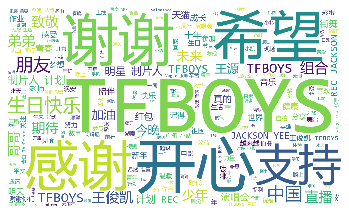

In [21]:
word_cloud(text).to_file('yyqx_wordcloud.jpg')